<a href="https://colab.research.google.com/github/willisg25/Stat24/blob/main/Willis_Lab_8_(Copy_of_Alexnet_Load_Slides_All_Hahn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #determines whether or not the computer running the program has a cpu capable of cuda, if not use gpu

def GPU(data): #converts data into pytorch tensor with gradient
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

def GPU_data(data): #converts into pytorch tensor without gradient
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray') #creates a grayscale image of tensor x
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

def get_google_slide(url): #downloads the docs presentation as a pdf file
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url): #converts the saved pdf to images for resolution purposes
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image, size=224): #set image size
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
        transforms.Resize(size), #resize
        transforms.CenterCrop(size), #Crop to center
        transforms.ToTensor(), #convert to tensor
        transforms.Normalize(means, stds) #normalize means and stardard deviation values
    ])
    tensor = transform(image).unsqueeze(0).to(device) #preparing tensor for input into neural network
    tensor.requires_grad = True
    return tensor



In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device) #sets alexnet to normal weights
model.eval(); #sets model to evaluation mode to refining consistency

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 73.5MB/s]


In [4]:
url = "https://docs.google.com/presentation/d/17Nxy2Wo0erk71fp4sCDQqHrHYkxwjdExjbosjoEewuU/edit#slide=id.p"

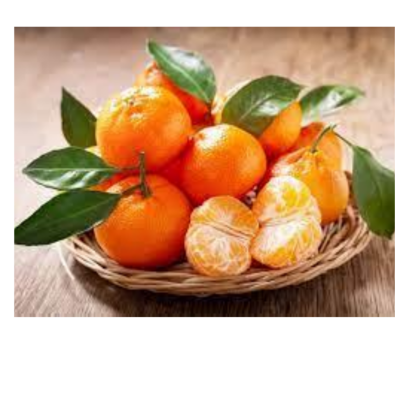

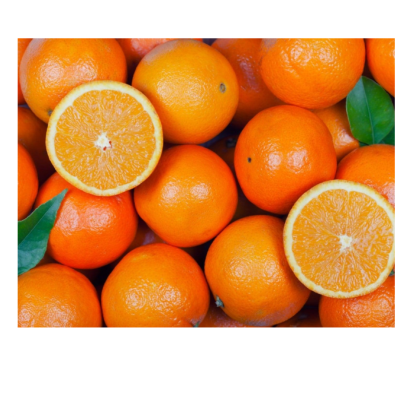

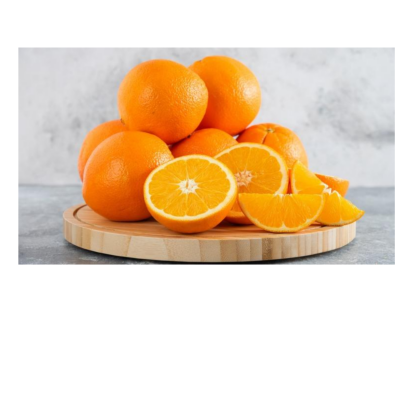

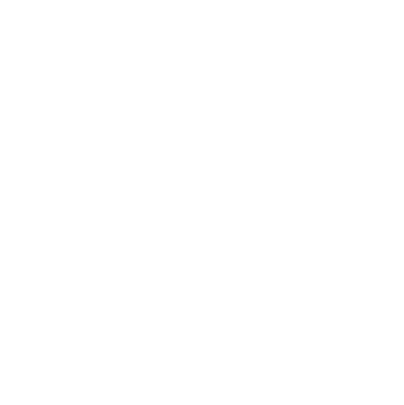

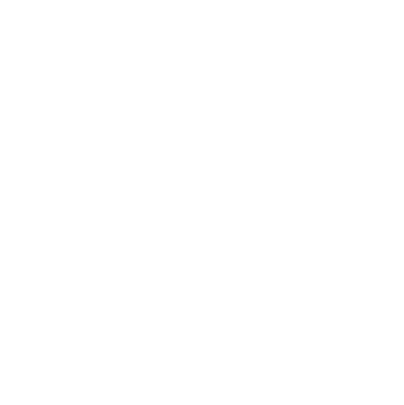

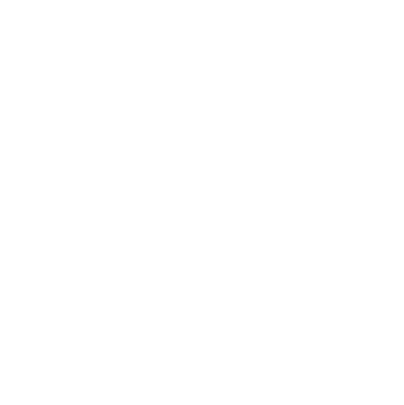

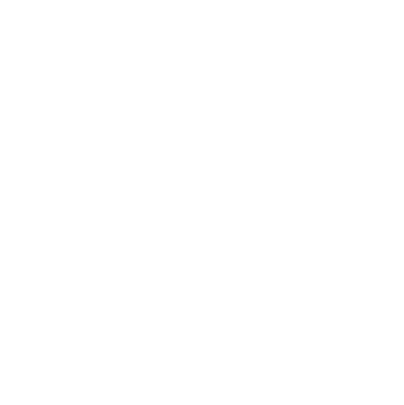

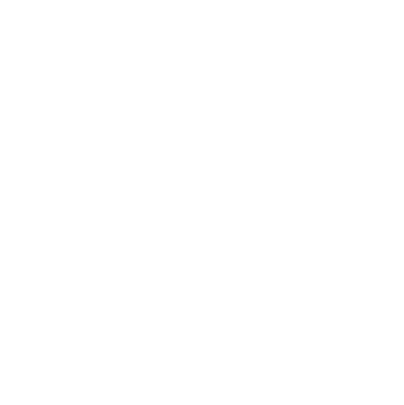

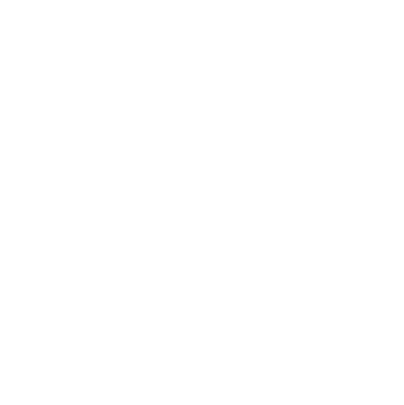

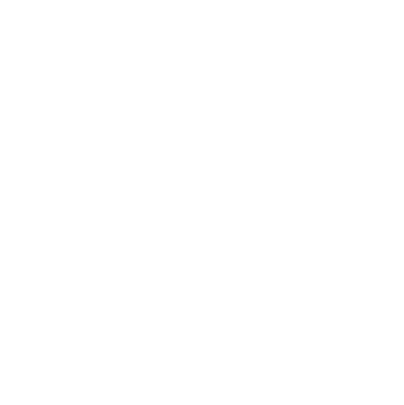

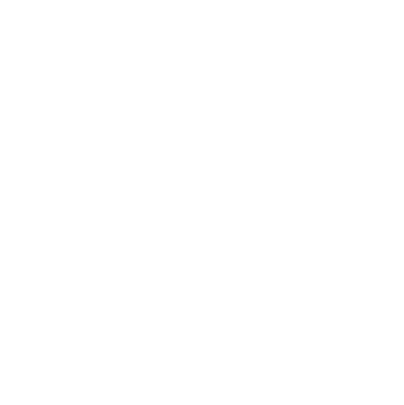

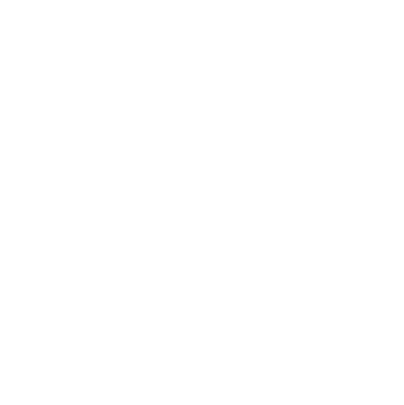

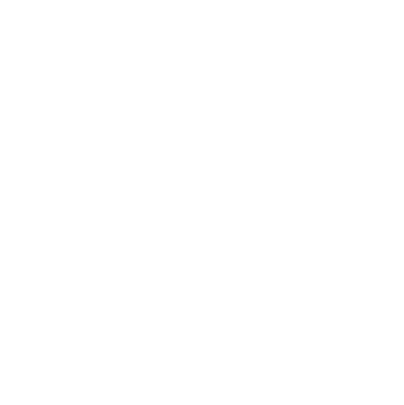

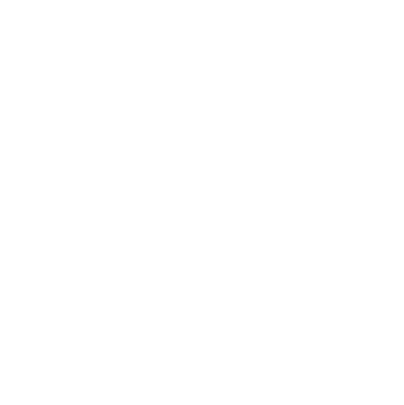

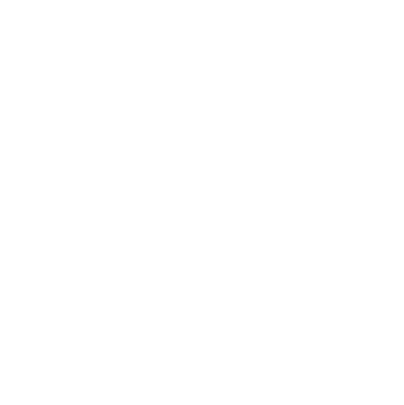

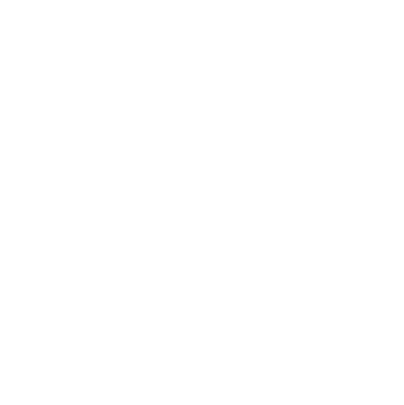

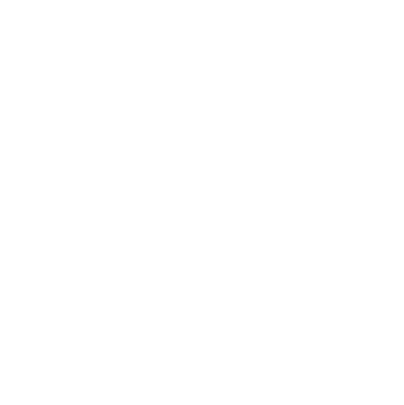

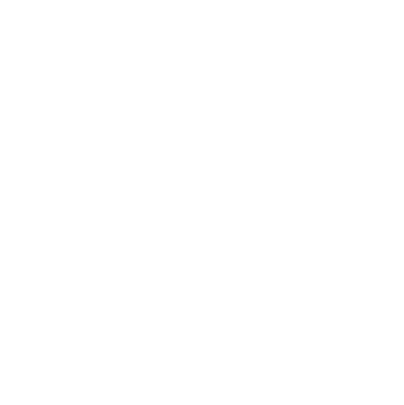

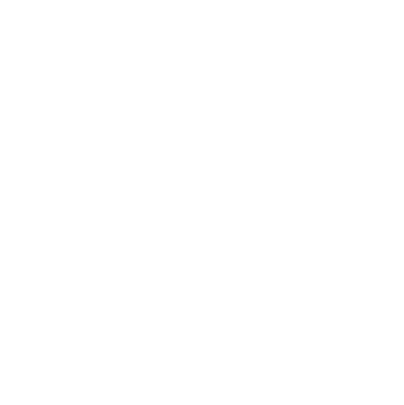

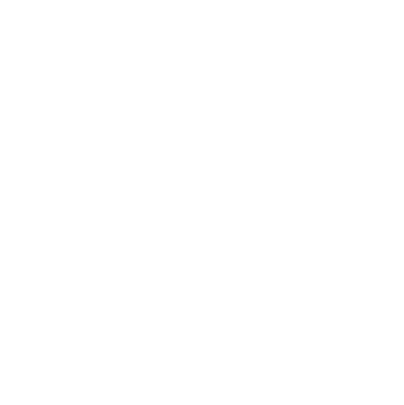

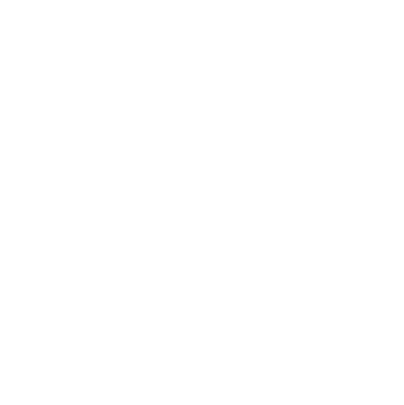

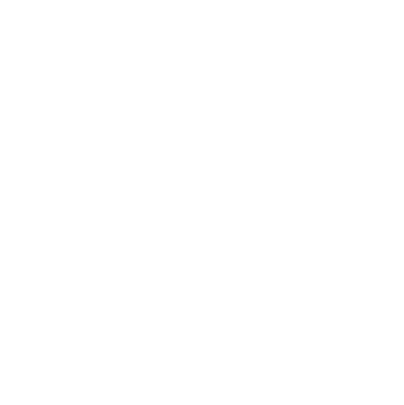

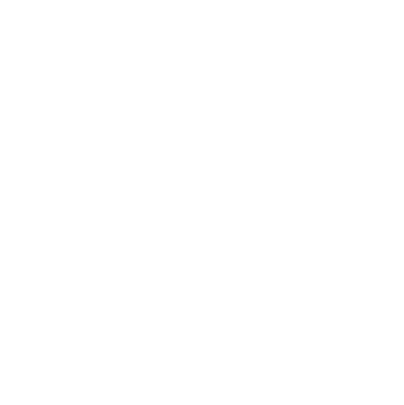

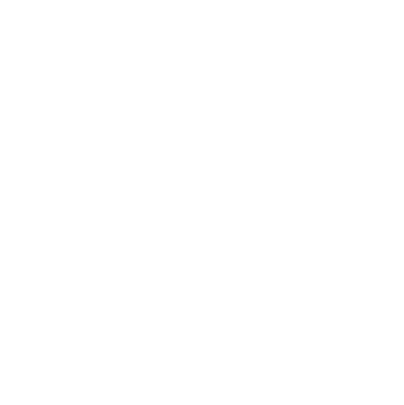

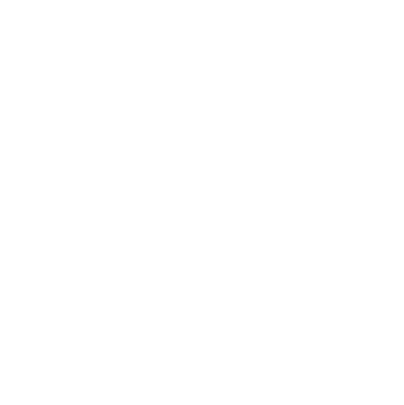

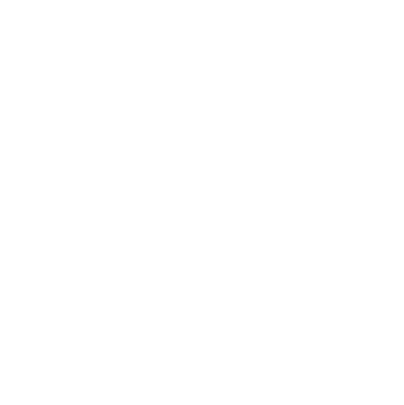

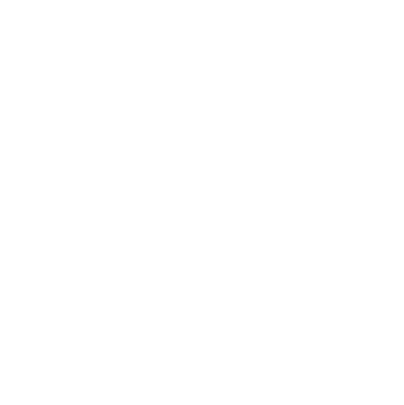

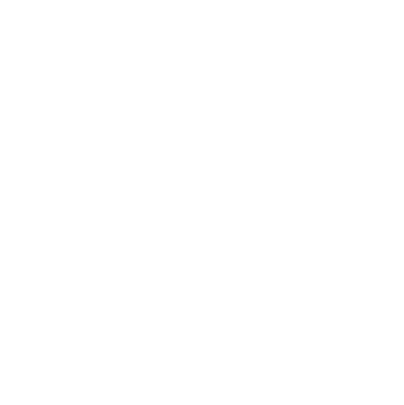

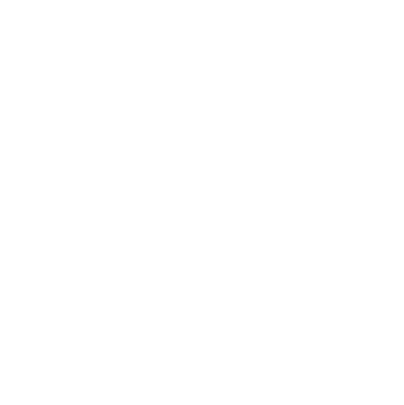

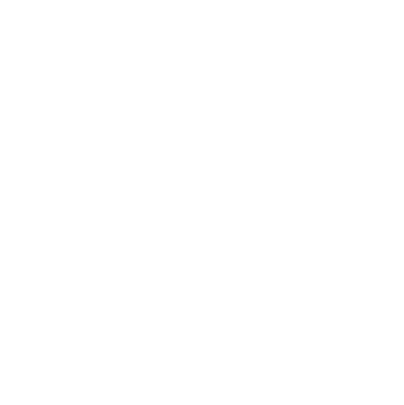

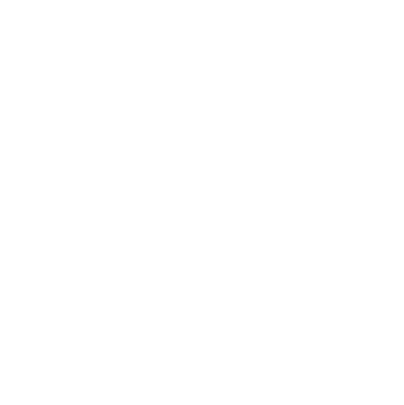

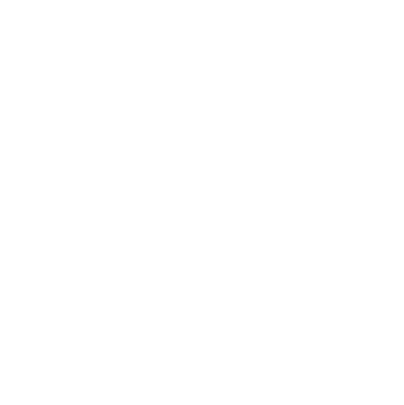

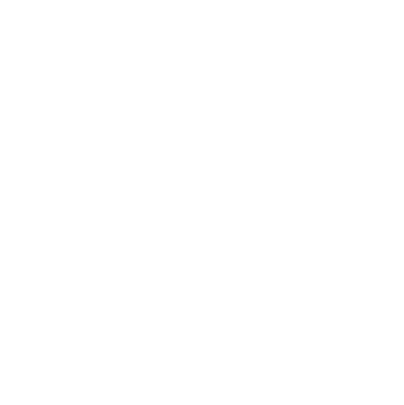

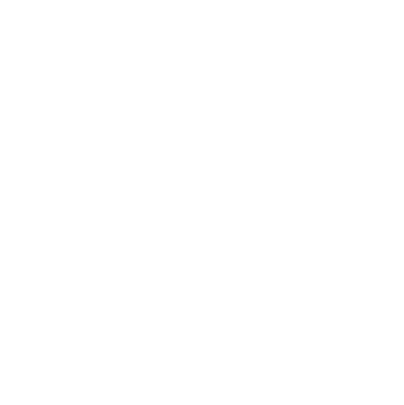

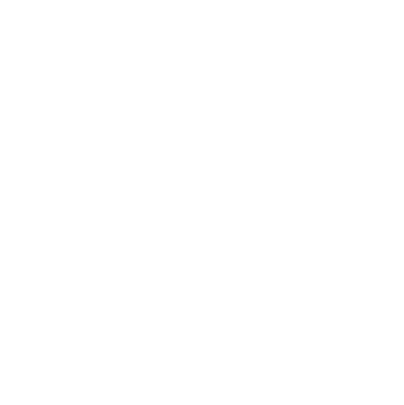

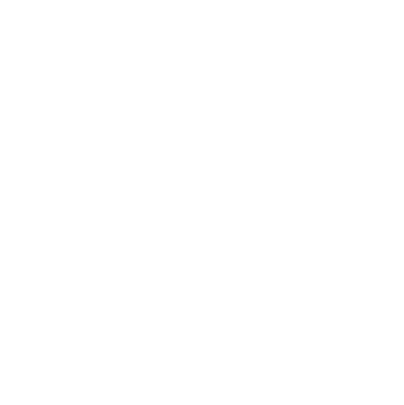

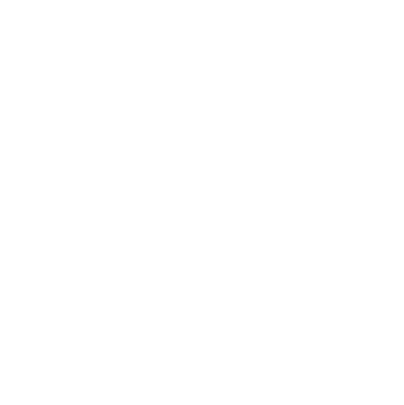

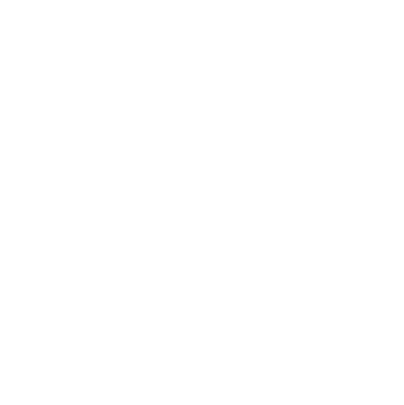

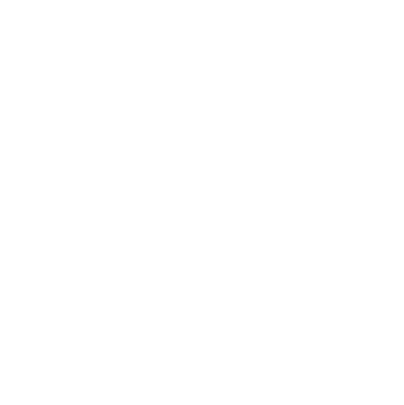

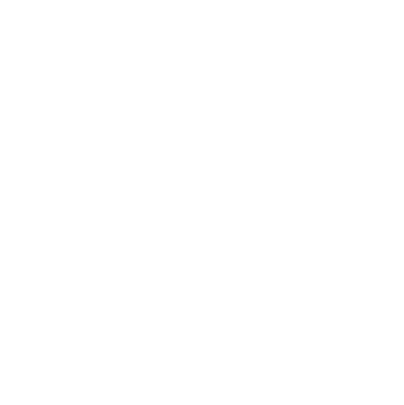

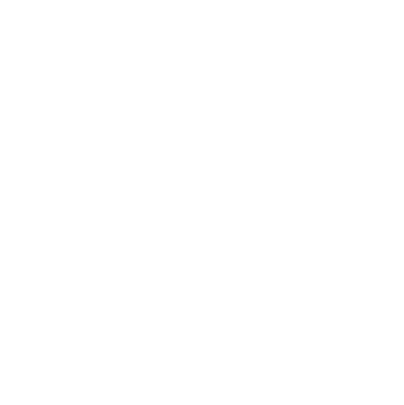

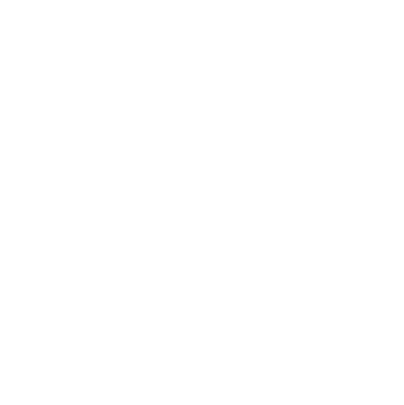

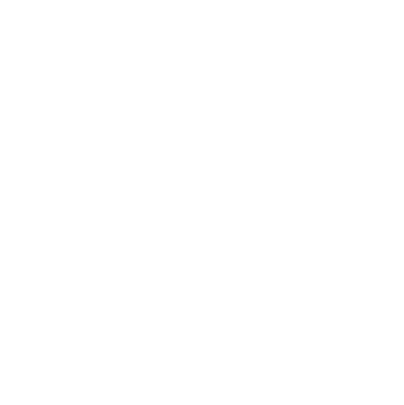

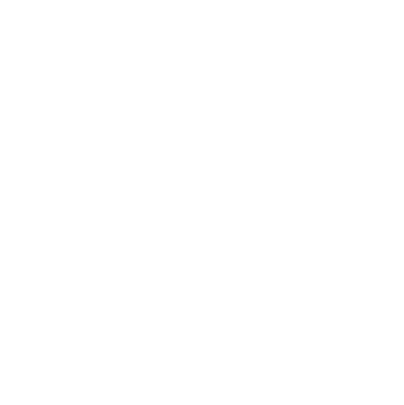

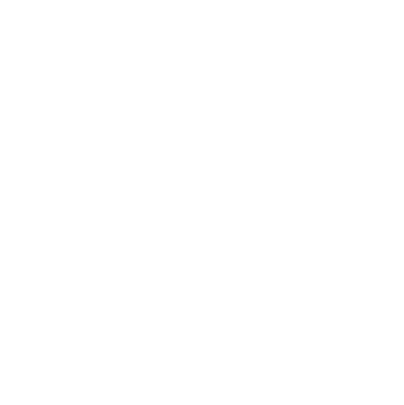

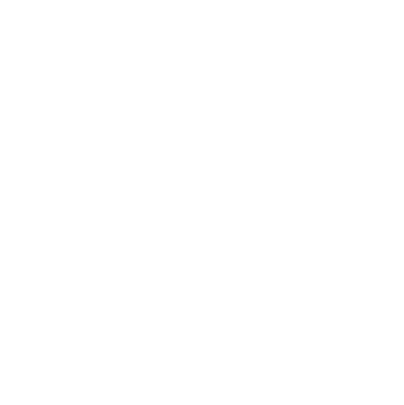

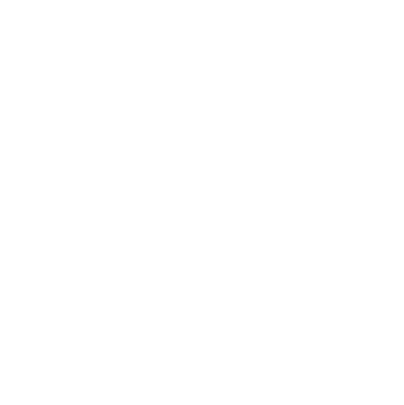

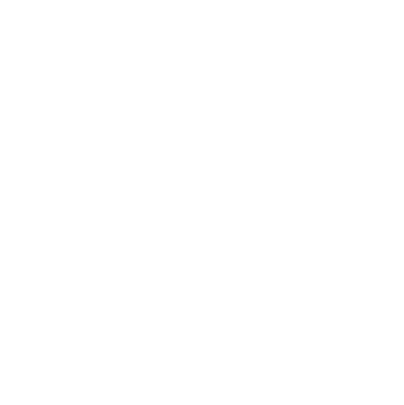

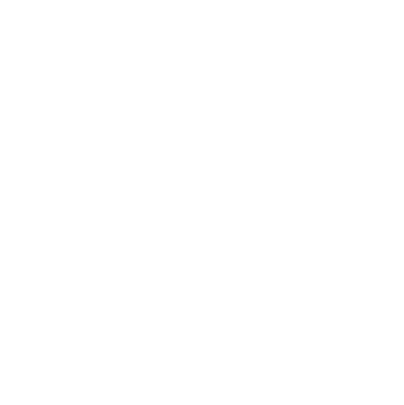

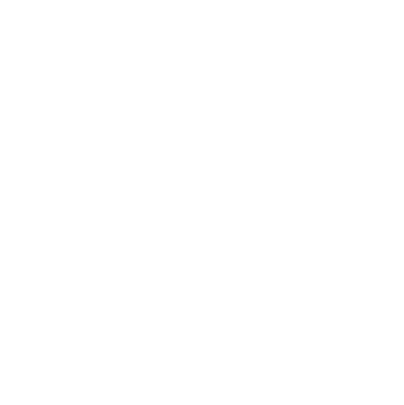

In [5]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image)) #send images to deep learning

images = torch.vstack(images) #stacks images into one vertical tensor

In [6]:
images.shape

torch.Size([50, 3, 224, 224])

In [7]:
model(images)

tensor([[-1.7277,  2.7394, -7.0347,  ...,  3.2731, 11.2839, -2.2833],
        [-4.6425, -1.9246, -6.0783,  ...,  4.2339, 11.9370,  0.2143],
        [-2.7203,  1.1848, -8.0670,  ...,  1.7115, 11.7991, -0.8466],
        ...,
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634],
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634],
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images)

In [9]:
y.shape

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy() #finds max along dimension 1 for y using the cpu and puts it into a numpy array

In [11]:
for i in list(guesses):
    print(labels[i])

spaghetti squash
orange
orange
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paper

In [12]:
Y = np.zeros(50,)
Y[25:] = 1

In [13]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [15]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
X = y.detach().cpu().numpy() #detaches tensor y using the cpu and puts it in a numpy array

In [17]:
X.shape

(50, 1000)

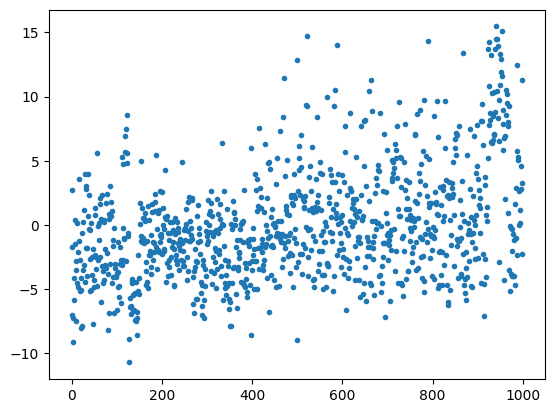

In [18]:
plt.plot(X[0],'.') #plot X

(array([  7.,  50., 205., 289., 220.,  98.,  58.,  43.,  15.,  15.]),
 array([-10.69981098,  -8.08401108,  -5.4682107 ,  -2.85241079,
         -0.23661061,   2.37918949,   4.9949894 ,   7.61078978,
         10.22659016,  12.84239006,  15.45818996]),
 <BarContainer object of 10 artists>)

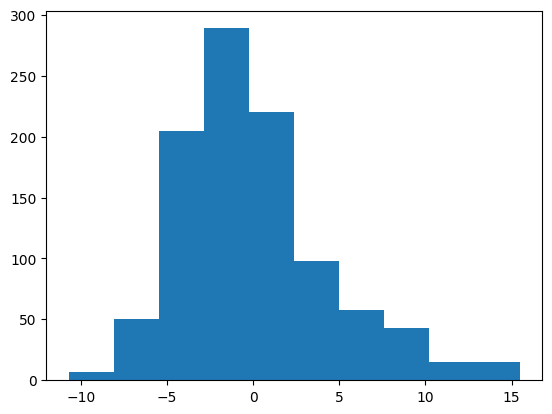

In [19]:
plt.hist(X[0]) #histogram of X

In [20]:
X = GPU_data(X) #tensors that are stored on the device specified, GPU data displays tensors with requires_grad=False
Y = GPU_data(Y)

In [21]:
def softmax(x): #convert logits to probabilities, ensuring they sum to one across classes for each instance
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [22]:
def cross_entropy(outputs, labels): #cross-entropy loss between outputs and labels
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [23]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [24]:
def Truncated_Normal(size): #similar to randntrunc but in pytorch instead

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [25]:
def acc(out,y): #calculates accuracy of the output compared to true lables
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [26]:
X.shape

torch.Size([50, 1000])

In [27]:
def get_batch(mode): # grabs batches of data
    b = c.b
    if mode == "train": #training mode
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test": #testing mode
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [28]:
def model(x,w):

    return x@w[0]

In [29]:
def make_plots():

    acc_train = acc(model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [30]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-13a1dae5b345>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)


KeyboardInterrupt: 